In [3]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

In [4]:
t,y,v_y,x,v_x=sp.symbols('t,y,v_y,x,v_x')

In [5]:
def d2ydt2(y,f1,f2):
    return np.array([y[2],y[3],f2(y[0],y[1],y[2],y[3],y[4]),f1(y[0],y[1],y[2],y[3],y[4]),1])

def RK42(x0,y0,vx0,vy0,dt,tf,f,g):
    f1=sp.lambdify([y,x,v_y,v_x,t],f)
    f2=sp.lambdify([y,x,v_y,v_x,t],g)
    ts=np.arange(0,tf,dt)
    n=len(ts)
    ##Posiciones
    ys=ts*0
    xs=ts*0
    #zs=ts*0
    ##Velocidades
    vys=ts*0
    vxs=ts*0
    #vzs=ts*0
    ##aceleraciones
    ays=ts*0
    axs=ts*0
    #azs=ts*0
    ##Condiciones iniciales
    ys[0]=y0
    xs[0]=x0
    
    vys[0]=vy0
    vxs[0]=vx0
    
    
    for i in range(0,n-1):
        z0=np.array([ys[i],xs[i],vys[i],vxs[i],ts[i]])
        k1=d2ydt2(z0,f1,f2)
        k2=d2ydt2(z0+(dt*k1)/2,f1,f2)
        k3=d2ydt2(z0+(dt*k2)/2,f1,f2)
        k4=d2ydt2(z0+dt*k3,f1,f2)
        
        ys[i+1]=ys[i]+(dt/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0])
        xs[i+1]=xs[i]+(dt/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1])
        vys[i+1]=vys[i]+(dt/6)*(k1[2]+2*k2[2]+2*k3[2]+k4[2])
        vxs[i+1]=vxs[i]+(dt/6)*(k1[3]+2*k2[3]+2*k3[3]+k4[3])
         
        ays[i]=f2(ys[i],xs[i],vys[i],vxs[i],ts[i])
        axs[i]=f1(ys[i],xs[i],vys[i],vxs[i],ts[i])
        
    plt.plot(xs,ys,color='black',label='Posicion x vs y')
    #plt.plot(ts,vxs,'k-',label='Velocidad x vs y')
    #plt.plot(ts,vxs,color='red',label='Velocidad')
    #plt.plot(ts,axs,color='blue',label='aceleracion')
    plt.axis('equal')
    plt.grid('on')
    plt.legend()
    plt.show()
    return ts,ys,xs,vys,vxs

In [12]:
f=-40*(x)/((x)**2+(y-1)**2)**(3/2)
g=-40*(y-1)/((x-0)**2+(y-1)**2)**(3/2)

f

-40*x/(x**2 + (y - 1)**2)**1.5

In [286]:
g

y*(7*sqrt(x**2 + y**2) - 1.4*(sqrt(x**2 + y**2) - 4)**3 - 28)/sqrt(x**2 + y**2)

In [11]:
k=2
l0=5
r=sp.sqrt(x**2+y**2)
m=1
#f=(-k*(r-l0)+(k/5)*(r-l0)**3)*(x/r)/m
#g=(-k*(r-l0)+(k/5)*(r-l0)**3)*(y/r)/m


f=(-k*(r-l0))*(x/r)/m
g=-9.81+(-k*(r-l0))*(y/r)/m

In [9]:
f

x*(28 - 7*sqrt(x**2 + y**2))/sqrt(x**2 + y**2)

In [10]:
g

y*(28 - 7*sqrt(x**2 + y**2))/sqrt(x**2 + y**2)

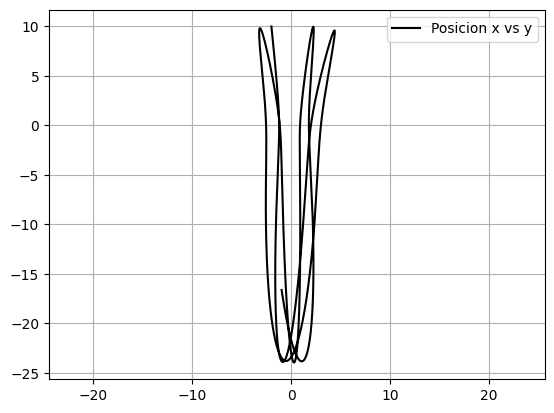

In [14]:
ts,ys,xs,vys,vxs=RK42(-2,10,0,0,0.001,20,f,g) # RK42(y0,x0,vx0,vy0,dt,tf,f,g)

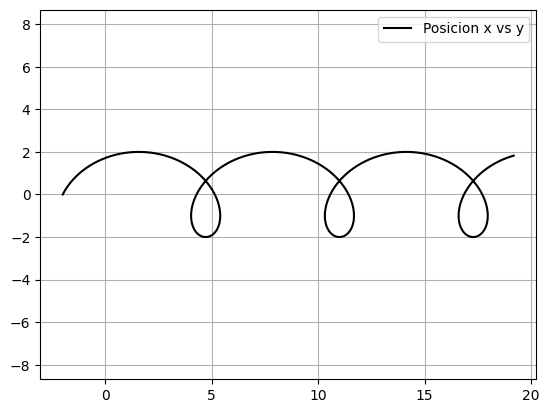

In [5]:
A=2
w=1
EyB=1
f=v_y*w
g=-w*(v_x-EyB)
ts,ys,xs,vys,vxs=RK42(-A/w,0,EyB,A,0.001,20,f,g) # RK42(y0,x0,vx0,vy0,dt,tf,f,g)

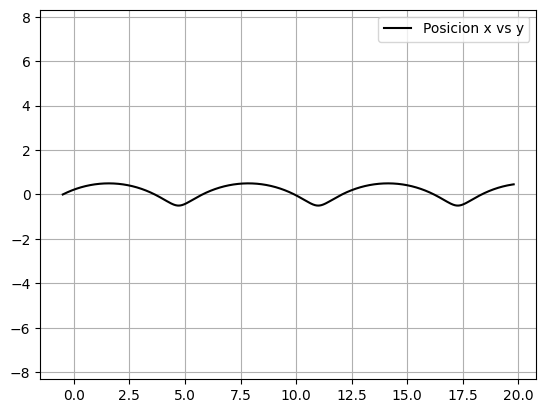

In [10]:
A=0.5
w=1
EyB=1
f=v_y*w
g=-w*(v_x-EyB)
ts,ys,xs,vys,vxs=RK42(-A/w,0,EyB,A,0.001,20,f,g) # RK42(y0,x0,vx0,vy0,dt,tf,f,g)

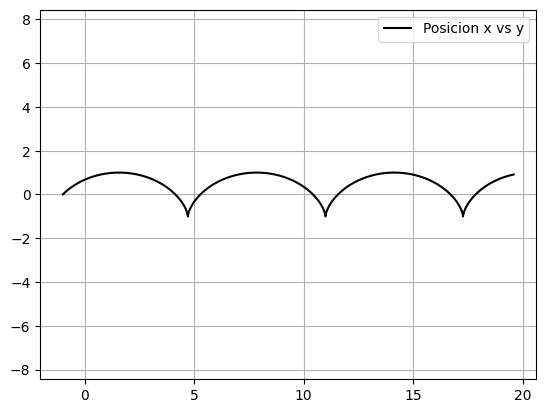

In [9]:
A=1
w=1
EyB=1
f=v_y*w
g=-w*(v_x-EyB)
ts,ys,xs,vys,vxs=RK42(-A/w,0,EyB,A,0.001,20,f,g) # RK42(y0,x0,vx0,vy0,dt,tf,f,g)

Animacion Pon



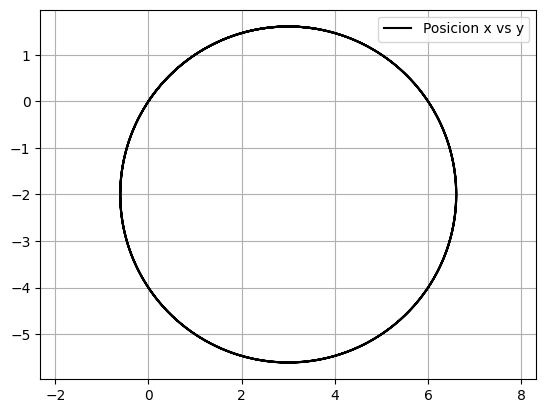

In [7]:
q=1
B=1
m=1
C=np.array([0,0,2,3])#Condiciones iniciales
f=q*B*v_y/m
g=-q*B*v_x/m
ts,ys,xs,vys,vxs=RK42(C[0],C[1],C[2],C[3],0.001,20,f,g) # RK42(y0,x0,vx0,vy0,dt,tf,f,g)

In [18]:
fig=plt.figure(figsize=(10, 10))
ax=fig.add_subplot(111)
plt.grid('on')
#plt.axis('equal')
plt.xlim(min(xs)-1,max(xs)+1)
plt.ylim(min(ys),max(ys))


def animate(i):
    ax.clear()
    plt.axis('equal')
    plt.grid('on')
    ax.plot(xs[:i],ys[:i],color='black',label='Trayectoria')
    ax.scatter(xs[i-1],ys[i-1],color='blue',label='particula',s=40)
    plt.legend()
    return fig
    
n=50
fr=np.arange(0, len(ts)+1,n)
anim=FuncAnimation(fig,animate,frames=fr,interval=20)
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()


In [11]:
fig=plt.figure(figsize=(10, 10))
#plt.plot(0,0,lw=1000,color='red')
plt.grid('on')
#plt.axis('equal')
plt.xlim(min(xs)-1,max(xs)+1)
plt.ylim(min(ys),max(ys))

resorte,=plt.plot([],[],color='black', label='posicion')

pp,=plt.plot([],[],'ro',label='Punta del resorte')
ppt,=plt.plot([],[],c='blue',label='resorte')
plt.legend()


def animate(i):
    resorte.set_data((xs[0:i],ys[0:i]))
    pp.set_data((xs[i-1],ys[i-1]))
    ppt.set_data(([0,xs[i-1]],[0,ys[i-1]]))
    
n=150
fr=np.arange(0, len(ts)+1,n)
anim=FuncAnimation(fig,animate,frames=fr,interval=20)
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()
